In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
import time

np.random.seed(1234)

In [2]:
h = 2
l = 1
r = 0.2
p = 1000

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [4]:
def generate_points(pd, pb, l, h):
    a = l / 2
    b = h / 2

    area = r**2 * np.pi
    p_new = int(pd * (1+area)) # Increase amount of points with percantage of circle covering

    dom = lhs(2, p_new)
    mask = np.sqrt((dom[:,0]*l - a)**2 + (dom[:,1]*h - b)**2) >= r
    dom = dom[mask]
    dom_x = dom[:,0] * l
    dom_y = dom[:,1] * h

    left_x = np.zeros(pb)
    left_y = lhs(1, pb) * h

    top_x = lhs(1, pb) * l
    top_y = np.ones(pb) * h

    right_x = np.ones(pb) * l
    right_y = lhs(1, pb) * h

    down_x = lhs(1, pb) * l
    down_y = np.zeros(pb)

    theta = np.random.uniform(0, 2*np.pi, pb)
    hole_x = a + r*np.cos(theta)
    hole_y = b + r*np.sin(theta)

    X = {'dom': dom_x, 'left': left_x, 'top': top_x, 'right': right_x, 'down': down_x, 'hole': hole_x}
    Y = {'dom': dom_y, 'left': left_y, 'top': top_y, 'right': right_y, 'down': down_y, 'hole': hole_y}
    return X, Y
    
    

In [5]:
X, Y = generate_points(1000, 50, l, h)


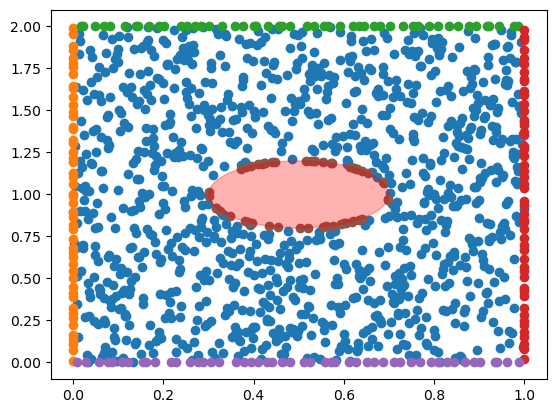

In [6]:
circle = plt.Circle((l/2, h/2), r, color='red', alpha=0.3)


figure, ax = plt.subplots()
ax.scatter(X['dom'], Y['dom'])
ax.scatter(X['left'], Y['left'])
ax.scatter(X['top'], Y['top'])
ax.scatter(X['right'], Y['right'])
ax.scatter(X['down'], Y['down'])
ax.scatter(X['hole'], Y['hole'])

ax.add_patch(circle)

plt.show()

tensor([[0.9630, 0.0432],
        [0.9201, 0.3613],
        [0.6187, 0.8443],
        [0.0846, 0.2722],
        [0.5588, 0.8672],
        [0.5834, 0.4361],
        [0.1247, 0.9431],
        [0.4231, 0.6262],
        [0.4655, 0.0200],
        [0.3533, 0.9977]], device='cuda:0')
torch.Size([8, 2])


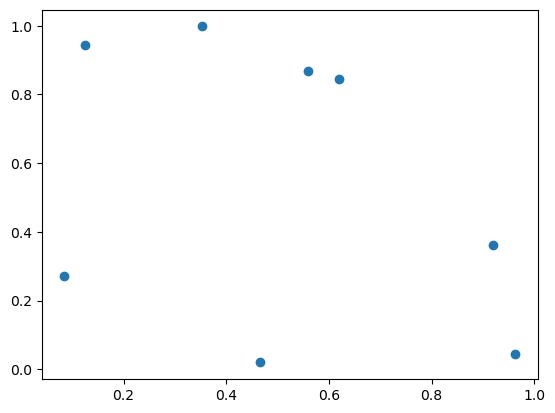

In [7]:
p = 10
x = torch.rand(p, device=device)
y = torch.rand(p, device=device)

# Create a tensor for valid points and invalid points
valid_points = torch.stack((x, y), dim=1)
print(valid_points)
mask = torch.sqrt((x-0.5)**2 + (y-0.5)**2) > r

out = valid_points[mask]

print(out.shape)  # Should be (p, 2)

x1 = out[:,0].detach().cpu().numpy()
y1 = out[:,1].detach().cpu().numpy()

plt.scatter(x1, y1)


In [8]:
theta = np.random.uniform(0, 2*np.pi, 10)
x = torch.tensor(np.cos(theta)).view(-1, 1).float()
y = torch.tensor(np.sin(theta)).view(-1, 1).float()
r = torch.sqrt(x**2 + y**2)

n = torch.stack([x/r, y/r], dim=1).float()

sxx = torch.rand(10).view(-1, 1).float()
syy = torch.rand(10).view(-1, 1).float()
sxy = torch.rand(10).view(-1, 1).float()

s = torch.cat([
    torch.cat([sxx, sxy], dim=1).unsqueeze(1),  # First row (xx, xy)
    torch.cat([sxy, syy], dim=1).unsqueeze(1)   # Second row (xy, yy)
], dim=1)

t = torch.bmm(s, n)

print(n.shape)
print(s.shape)
print(t)
print(t.shape)



torch.Size([10, 2, 1])
torch.Size([10, 2, 2])
tensor([[[-0.1770],
         [-0.7948]],

        [[-0.1973],
         [-0.4051]],

        [[ 0.5853],
         [ 0.7870]],

        [[-0.6807],
         [-0.4421]],

        [[-0.8920],
         [-0.4281]],

        [[ 0.3294],
         [ 0.3273]],

        [[ 0.7958],
         [ 0.0646]],

        [[-0.2974],
         [ 0.6643]],

        [[-0.1544],
         [-0.5867]],

        [[ 0.8322],
         [ 0.5984]]])
torch.Size([10, 2, 1])
